In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '../0.data/training_data/'

list = ['BG', 'EN', 'HI', 'PT']

### 1. classify based on languages



In [12]:
roles_dict = {}
sub_roles_dict = {}

for entry in list:
    language_path = os.path.join(path, entry, 'subtask-1-annotations.txt')
    language_path = os.path.normpath(language_path).replace("\\", "/")
    # print(language_path)

    df = pd.read_csv(language_path, sep='\t', header=None, names=range(8))
    df = df[[4, 5, 6, 7]]
    
    distribution_roles = df[4].value_counts()
    distribution_roles_dict = distribution_roles.to_dict()
    roles_dict[entry] = distribution_roles

    distribution_sub_roles = df[5].value_counts()
    distribution_sub_roles = distribution_sub_roles.add(df[6].value_counts(), fill_value=0)
    distribution_sub_roles = distribution_sub_roles.add(df[7].value_counts(), fill_value=0)

    distribution_sub_roles_dict = distribution_sub_roles.to_dict()
    sub_roles_dict[entry] = distribution_sub_roles


sub_roles_dict

{'BG': Bigot                 4.0
 Conspirator          53.0
 Corrupt              25.0
 Deceiver              9.0
 Exploited            11.0
 Foreign Adversary    85.0
 Forgotten             4.0
 Guardian              4.0
 Incompetent          67.0
 Instigator           57.0
 Martyr                5.0
 Peacemaker           18.0
 Rebel                15.0
 Saboteur              2.0
 Scapegoat             2.0
 Terrorist            24.0
 Traitor              10.0
 Tyrant               36.0
 Underdog              3.0
 Victim               88.0
 Virtuous             10.0
 Name: count, dtype: float64,
 'EN': Bigot                 9.0
 Conspirator          38.0
 Corrupt              17.0
 Deceiver             26.0
 Exploited             6.0
 Foreign Adversary    35.0
 Forgotten             1.0
 Guardian             40.0
 Incompetent          35.0
 Instigator           49.0
 Martyr               11.0
 Peacemaker           15.0
 Rebel                11.0
 Saboteur             20.0
 Scapegoat   

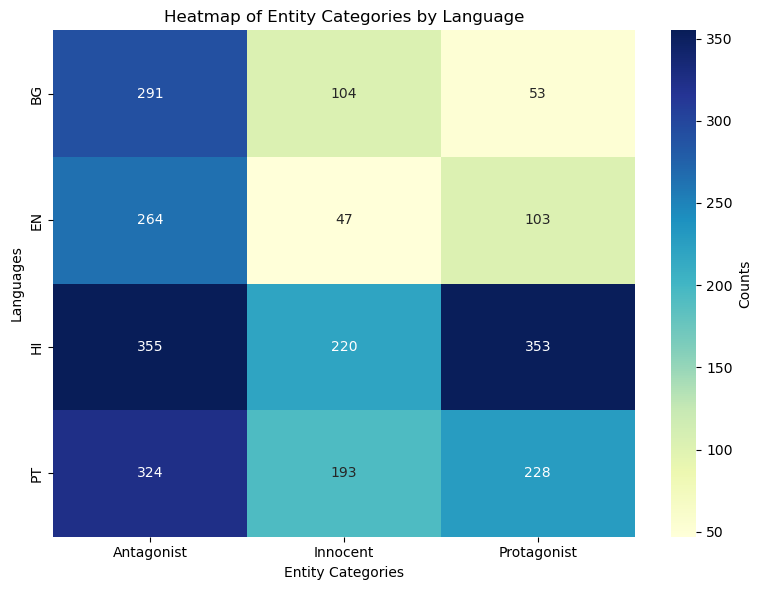

In [13]:
# Convert to a DataFrame
df = pd.DataFrame(roles_dict).T

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Counts'})
plt.title("Heatmap of Entity Categories by Language")
plt.ylabel("Languages")
plt.xlabel("Entity Categories")
plt.tight_layout()
plt.show()

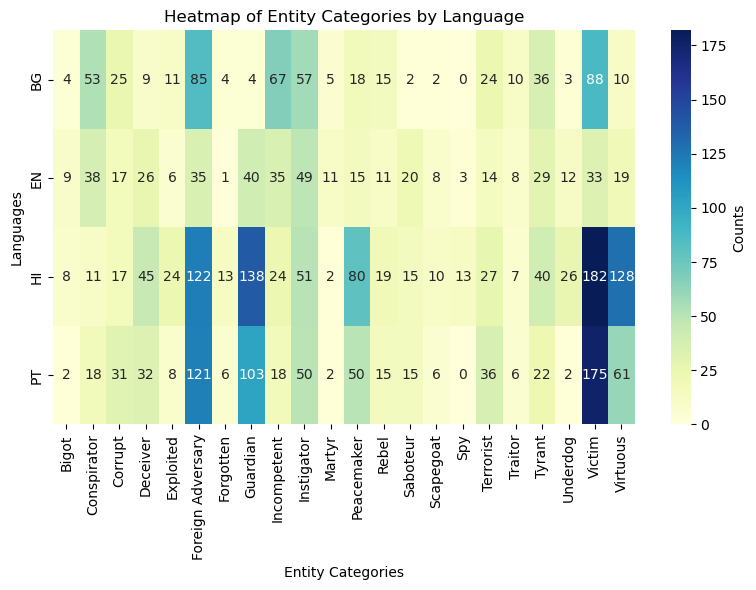

In [14]:
# Convert to a DataFrame
# df = pd.DataFrame(sub_roles_dict).T
df = pd.DataFrame(sub_roles_dict).fillna(0).astype(int).T

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Counts'})
plt.title("Heatmap of Entity Categories by Language")
plt.ylabel("Languages")
plt.xlabel("Entity Categories")
plt.tight_layout()
plt.show()

### 2. Separation into topics is not possible because can't read topics in hindi from title 